

 **Predicting Blood Donation in March 2007**

Your machine learning model is designed to predict whether individuals will donate blood in March 2007 based on certain features. Here's a summary of its performance:

- **Training Score**: The model achieved an accuracy of 80% on the training data. This indicates that the model was able to correctly predict the donation outcomes for 80% of the individuals in the training dataset.

- **Test Score**: The model also achieved an accuracy of 80% on the test data. This suggests that the model's performance remained consistent when presented with unseen data.

- **Confusion Matrix**:
  ```
  [[166  11]
   [ 33  15]]
  ```
  The confusion matrix provides insights into the model's classification performance:
  - The top-left value (166) represents the number of true negatives (TN) – instances correctly predicted as not donating blood.
  - The top-right value (11) is the number of false positives (FP) – instances incorrectly predicted as donating blood.
  - The bottom-left value (33) is the number of false negatives (FN) – instances incorrectly predicted as not donating blood.
  - The bottom-right value (15) is the number of true positives (TP) – instances correctly predicted as donating blood.

- **Classification Report**:
  ```
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       177
           1       0.58      0.31      0.41        48

    accuracy                           0.80       225
   macro avg       0.71      0.63      0.64       225
weighted avg       0.78      0.80      0.78       225
  ```
  The classification report provides additional metrics to evaluate the model's performance for both classes:
  - Precision measures the accuracy of positive predictions.
  - Recall (also called sensitivity) measures the ability to correctly identify positive instances.
  - F1-score is the harmonic mean of precision and recall, providing a balanced measure of the two.
  - Support indicates the number of actual instances for each class.
  
  In conclusion, the model achieved an 80% accuracy in predicting blood donation for March 2007, demonstrating balanced precision and recall for individuals not donating blood. While improvements are possible, the model provides a foundational insight into blood donation behavior.


Importing required libraries

In [1]:
import numpy as np
import pandas as pd

Reading the CSV file into a DataFrame

In [2]:
blood=pd.read_csv("transfusion.csv")

In [3]:
blood

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


Displaying the first few rows of the dataset

In [4]:
blood.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Displaying the last few columns of the dataset

In [5]:
blood.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


Describing the Dataset

In [6]:
blood.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


Displaying the Shape of the Dataset

In [7]:
blood.shape

(748, 5)

Displaying the Size of the Dataset

In [8]:
blood.size

3740

Displaying the datatypes of the Dataset

In [9]:
blood.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

Check the null values in Dataset

In [10]:
blood.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

Creating a copy of the dataset

In [11]:
blood_copy=blood.copy()

In [12]:
blood_copy

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


Separating features (x) and target (y) variables

In [13]:
x=blood_copy.drop(["whether he/she donated blood in March 2007"],axis=1)

In [14]:
y=blood_copy["whether he/she donated blood in March 2007"]

In [15]:
x

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [16]:
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: whether he/she donated blood in March 2007, Length: 748, dtype: int64

Splitting the dataset into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

Initializing a Random Forest Classifier with specified parameters

In [28]:
from sklearn.ensemble import RandomForestClassifier 
classifier=RandomForestClassifier(n_estimators=100,max_depth=4)

Training the classifier on the training data

Calculating and printing the training accuracy

In [29]:
classifier.fit(x_train,y_train)
classifier.score(x_train,y_train)

0.8087954110898662

Calculating and printing the testing accuracy

In [30]:
classifier.score(x_test,y_test)

0.8044444444444444

Predicting the target values on the test data

In [31]:
y_pred=classifier.predict(x_test)

Generating a confusion matrix and classification report

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix\n\n",cm)
report=classification_report(y_test,y_pred)
print("classification report\n\n",report)

confusion matrix

 [[166  11]
 [ 33  15]]
classification report

               precision    recall  f1-score   support

           0       0.83      0.94      0.88       177
           1       0.58      0.31      0.41        48

    accuracy                           0.80       225
   macro avg       0.71      0.63      0.64       225
weighted avg       0.78      0.80      0.78       225



Plotting a heatmap of the confusion matrix


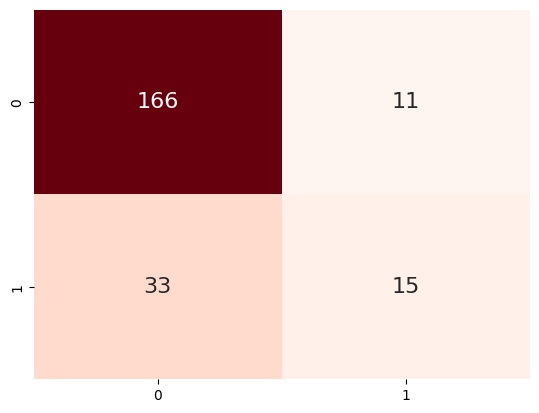

In [38]:
from seaborn import heatmap
blt=heatmap(cm,cmap='Reds',annot=True,fmt='d',cbar=False,annot_kws={'size':16})